In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('student_performance.csv')
df.head(5)

,Age,Gender,family_income,parent_education_level,School,Level,100_level_cgpa,current_cgpa,MATH 101,MATH 102,...,Do you have health issues that affect your studies,Education motivation level,study_hours,study_preference,Internet_access,time_management_skills,Peer influence on student perfromance,course_material,Hall_distance,Extracurricular activity
0,17.8,NaN,NaN,NaN,NaN,NaN,5.0,NaN,B,C,...,NaN,NaN,20,Self-study,NaN,NaN,3,2.0,1 km - 2km,Yes
1,17.0,Female,"Greater than 70,000,000 per annum",Postgraduate,Computing,400.0,4.5,4.0,B,A,...,No,High,< 40 hours,Self-study,Yes,Average,10,3.0,1 km,Yes
2,18.0,Male,"30,000,000-50,000,000 naira per annum",Bachelor's,Computing,300.0,5.0,5.0,A,A,...,No,High,< 40 hours,Self-study,Yes,Average,1,5.0,Less than 1 km,No
3,18.0,Male,"< 30,000,000 naira/yesr",Postgraduate,Computing,200.0,4.0,4.0,B,A,...,No,Medium,< 40 hours,Self-study,Yes,Average,8,4.0,Less than 1 km,Yes
4,17.0,Male,"30,000,000-50,000,000 naira per annum",Postgraduate,Computing,200.0,4.5,4.5,A,A,...,No,Medium,< 40 hours,Self-study,Yes,Poor,10,4.0,1 km,Yes


In [4]:
df.columns= df.columns.str.strip()
df.columns

Index(['Age', 'Gender', 'family_income', 'parent_education_level', 'School',
       'Level', '100_level_cgpa', 'current_cgpa', 'MATH 101', 'MATH 102',
       'COSC 111', 'PHY101', 'PHY102', 'classAttendance', 'Assignment_score',
       'Assignment_performance', 'class_participation',
       'Rate your attendance to classes', 'Rate your overall performance.',
       'Do you have health issues that affect your studies',
       'Education motivation level', 'study_hours', 'study_preference',
       'Internet_access', 'time_management_skills',
       'Peer  influence on student perfromance', 'course_material',
       'Hall_distance', 'Extracurricular activity'],
      dtype='object')

In [5]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['Age', 'Gender', 'family_income', 'parent_education_level', 'School',
       'Level', '100_level_cgpa', 'current_cgpa', 'MATH_101', 'MATH_102',
       'COSC_111', 'PHY101', 'PHY102', 'classAttendance', 'Assignment_score',
       'Assignment_performance', 'class_participation',
       'Rate_your_attendance_to_classes', 'Rate_your_overall_performance.',
       'Do_you_have_health_issues_that_affect_your_studies',
       'Education_motivation_level', 'study_hours', 'study_preference',
       'Internet_access', 'time_management_skills',
       'Peer__influence_on_student_perfromance', 'course_material',
       'Hall_distance', 'Extracurricular_activity'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace("__","_")
df.columns

Index(['Age', 'Gender', 'family_income', 'parent_education_level', 'School',
       'Level', '100_level_cgpa', 'current_cgpa', 'MATH_101', 'MATH_102',
       'COSC_111', 'PHY101', 'PHY102', 'classAttendance', 'Assignment_score',
       'Assignment_performance', 'class_participation',
       'Rate_your_attendance_to_classes', 'Rate_your_overall_performance.',
       'Do_you_have_health_issues_that_affect_your_studies',
       'Education_motivation_level', 'study_hours', 'study_preference',
       'Internet_access', 'time_management_skills',
       'Peer_influence_on_student_perfromance', 'course_material',
       'Hall_distance', 'Extracurricular_activity'],
      dtype='object')

In [7]:
df = df.drop(index=0).reset_index(drop=True)
df

,Age,Gender,family_income,parent_education_level,School,Level,100_level_cgpa,current_cgpa,MATH_101,MATH_102,...,Do_you_have_health_issues_that_affect_your_studies,Education_motivation_level,study_hours,study_preference,Internet_access,time_management_skills,Peer_influence_on_student_perfromance,course_material,Hall_distance,Extracurricular_activity
0,17.0,Female,"Greater than 70,000,000 per annum",Postgraduate,Computing,400.0,4.50,4.0,B,A,...,No,High,< 40 hours,Self-study,Yes,Average,10,3.0,1 km,Yes
1,18.0,Male,"30,000,000-50,000,000 naira per annum",Bachelor's,Computing,300.0,5.00,5.0,A,A,...,No,High,< 40 hours,Self-study,Yes,Average,1,5.0,Less than 1 km,No
2,18.0,Male,"< 30,000,000 naira/yesr",Postgraduate,Computing,200.0,4.00,4.0,B,A,...,No,Medium,< 40 hours,Self-study,Yes,Average,8,4.0,Less than 1 km,Yes
3,17.0,Male,"30,000,000-50,000,000 naira per annum",Postgraduate,Computing,200.0,4.50,4.5,A,A,...,No,Medium,< 40 hours,Self-study,Yes,Poor,10,4.0,1 km,Yes
4,19.0,Male,"< 30,000,000 naira/yesr",Bachelor's,Computing,300.0,4.00,4.0,B,A,...,No,Medium,< 40 hours,Self-study,Yes,Average,6,4.0,2 km,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,21.0,Female,"< 30,000,000 naira/yesr",Bachelor's,Computing,400.0,4.50,4.5,A,B,...,Yes,High,< 40 hours,Self-study,Yes,Poor,10,5.0,10km,Yes
83,20.0,Female,"< 30,000,000 naira/yesr",Bachelor's,Public Health,500.0,3.00,4.0,B,C,...,Yes,Medium,20,Self-study,No,Average,5,3.0,Less than 1 km,Yes
84,22.0,Female,"50,000,000-70,000,000 naira per annum",Postgraduate,NaN,500.0,3.35,4.0,C,B,...,No,High,10,Self-study,No,Average,6,4.0,1 km,Yes
85,19.0,Female,"30,000,000-50,000,000 naira per annum",Bachelor's,Computing,300.0,3.35,4.5,A,A,...,No,Medium,20,Self-study,Yes,Average,5,2.0,1 km,Yes


In [8]:
df.isnull().sum()

Age                                                   0
Gender                                                0
family_income                                         4
parent_education_level                                1
School                                                2
Level                                                 2
100_level_cgpa                                        0
current_cgpa                                          0
MATH_101                                              0
MATH_102                                              0
COSC_111                                              0
PHY101                                                0
PHY102                                                0
classAttendance                                       0
Assignment_score                                      0
Assignment_performance                                2
class_participation                                   1
Rate_your_attendance_to_classes                 

In [9]:
df['Age'] =  df['Age'].astype(int)
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 87 entries, 0 to 86
Series name: Age
Non-Null Count  Dtype
--------------  -----
87 non-null     int32
dtypes: int32(1)
memory usage: 480.0 bytes


In [10]:
missing_counts = df.isnull().sum()  # Count missing values per column
missing_counts = missing_counts[missing_counts > 0]  # Show only columns with missing values

# Display missing values count
missing_counts

family_income                 4
parent_education_level        1
School                        2
Level                         2
Assignment_performance        2
class_participation           1
Education_motivation_level    1
study_hours                   3
course_material               1
Hall_distance                 2
Extracurricular_activity      3
dtype: int64

#### REPLACE MISSING VALUES

In [11]:
df['family_income']=df['family_income'].str.replace('yesr','year')

df['family_income'].fillna('undisclose', inplace=True)
df['family_income'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_13668\2968879219.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['family_income'].fillna('undisclose', inplace=True)


0

In [12]:
df['parent_education_level'].fillna('Other', inplace=True)
df['parent_education_level'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_13668\4227371103.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parent_education_level'].fillna('Other', inplace=True)


0

In [13]:
missing_counts = df.isnull().sum()  # Count missing values per column
missing_counts = missing_counts[missing_counts > 0]  # Show only columns with missing values

# Display missing values count
missing_counts

School                        2
Level                         2
Assignment_performance        2
class_participation           1
Education_motivation_level    1
study_hours                   3
course_material               1
Hall_distance                 2
Extracurricular_activity      3
dtype: int64

In [14]:
df.isnull().sum()

Age                                                   0
Gender                                                0
family_income                                         0
parent_education_level                                0
School                                                2
Level                                                 2
100_level_cgpa                                        0
current_cgpa                                          0
MATH_101                                              0
MATH_102                                              0
COSC_111                                              0
PHY101                                                0
PHY102                                                0
classAttendance                                       0
Assignment_score                                      0
Assignment_performance                                2
class_participation                                   1
Rate_your_attendance_to_classes                 

In [15]:
df['School'].fillna('Other',inplace=True)
df['Extracurricular_activity'].fillna('Yes', inplace=True)
df['School'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_13668\1933886966.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['School'].fillna('Other',inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13668\1933886966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

0

In [16]:
df['Extracurricular_activity'].value_counts()

Extracurricular_activity
Yes    53
No     34
Name: count, dtype: int64

In [17]:
df['Hall_distance'].unique()
df['Hall_distance'].fillna('< 10km', inplace=True)
df.study_hours.fillna('< 40 hours',inplace=True)
courseMatAvg  = round(df.course_material.mean())
df.course_material.fillna(courseMatAvg, inplace=True)
df.Level.fillna(300, inplace=True)
AssPerMean = df.Assignment_performance.mean()
df['Assignment_performance'].fillna(AssPerMean, inplace=True)
C_P = round(df.class_participation.mean())
df.class_participation.fillna(C_P, inplace=True)
df.Education_motivation_level.fillna('Medium', inplace=True)
df.Extracurricular_activity.fillna('Yes', inplace=True)
df.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_13668\65562141.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hall_distance'].fillna('< 10km', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13668\65562141.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Age                                                   0
Gender                                                0
family_income                                         0
parent_education_level                                0
School                                                0
Level                                                 0
100_level_cgpa                                        0
current_cgpa                                          0
MATH_101                                              0
MATH_102                                              0
COSC_111                                              0
PHY101                                                0
PHY102                                                0
classAttendance                                       0
Assignment_score                                      0
Assignment_performance                                0
class_participation                                   0
Rate_your_attendance_to_classes                 

#### EXPLORATION DATA ANALYSIS AND VISUALIZATION

##### Total number of respondents

In [18]:
totalRespondent = df.count()
totalRespondent.iloc[3]

87

#### Level Distribution

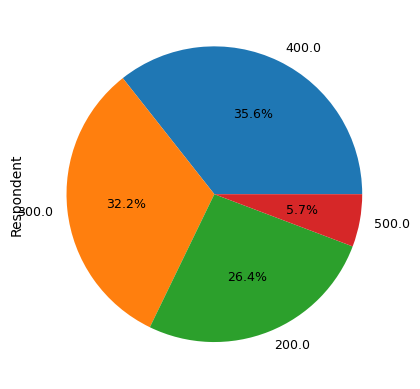

In [19]:
df['Level'].astype(int)

df.Level.value_counts().plot(kind="pie", xlabel="Level", ylabel="Respondent",
                            autopct="%1.1f%%", fontsize=9)

plt.show()

In [21]:
# plt.title("Correlation Heatmap")
# sns.heatmap(df.du.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.show()

### 📌 Summary of Correlation Heatmap
Strong Positive Correlations:

 - High class attendance leads to better assignment performance and higher CGPA.
 - Good assignment scores improve overall academic performance.

###### Moderate Positive Correlations:

Early academic success (100_level_cgpa) strongly predicts current CGPA.
Negative Correlations:

Older students tend to have lower CGPA.
Higher academic levels have lower 100-level CGPA.

📊 Key Takeaways:
 - Attendance and assignments are crucial for academic success. 
 - Past performance is a strong predictor of future success.
 - Older students may need extra academic support.

In [ ]:
# # Countplot for Categorical Variables
# categorical_columns = ['Gender', 'School', 'parent_education_level', 'Internet_access']
# for col in categorical_columns:
#     plt.figure(figsize=(6, 4))
#     sns.countplot(x=df[col], palette="coolwarm")
#     plt.title(f"Distribution of {col}")
#     plt.xticks(rotation=45)
#     plt.show()

# # Correlation Heatmap (for numerical features)
# plt.figure(figsize=(12, 6))


# plt.show()

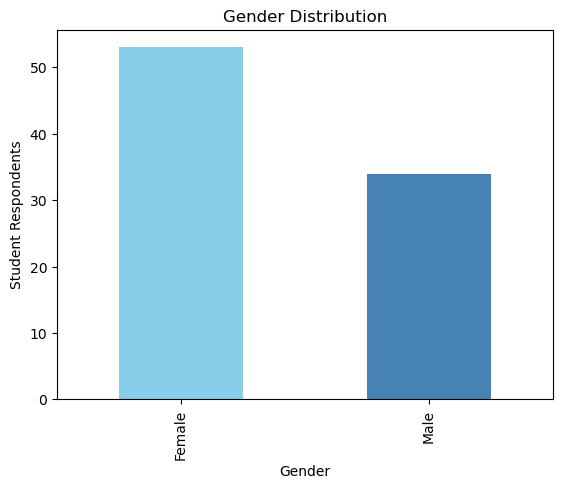

In [22]:
plt.title("Gender Distribution")
sns.set_palette("muted")
df['Gender'].value_counts().plot(kind="bar", color=("skyblue", "#4682B4"), xlabel="Gender", ylabel="Student Respondents")
plt.show()

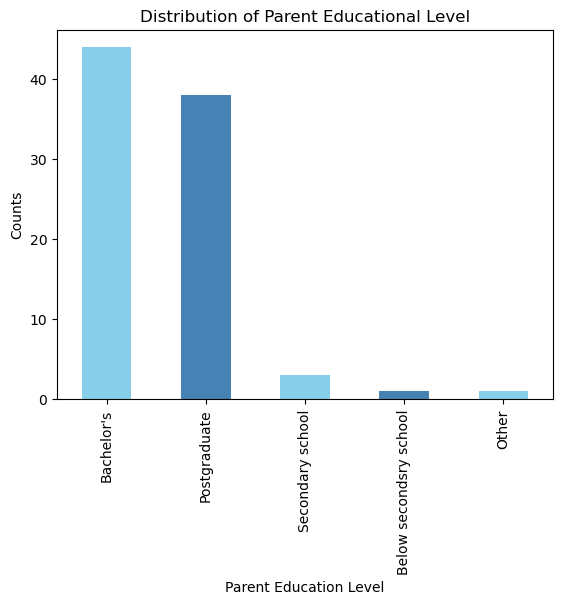

In [23]:
plt.title("Distribution of Parent Educational Level")
sns.set_palette("muted")
df['parent_education_level'].value_counts().plot(kind="bar",
                                                 color=("skyblue", "#4682B4"),
                                                 xlabel="Parent Education Level",
                                                 ylabel="Counts")
plt.show()

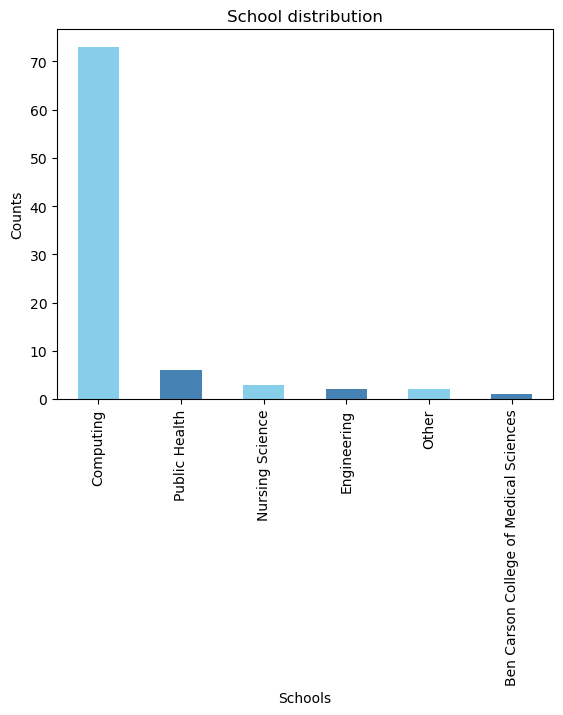

In [24]:

plt.title("School distribution")
sns.set_palette("muted")
df['School'].value_counts().plot(kind="bar",
                                                 color=("skyblue", "#4682B4"),
                                                 xlabel="Schools",
                                                 ylabel="Counts")
plt.show()

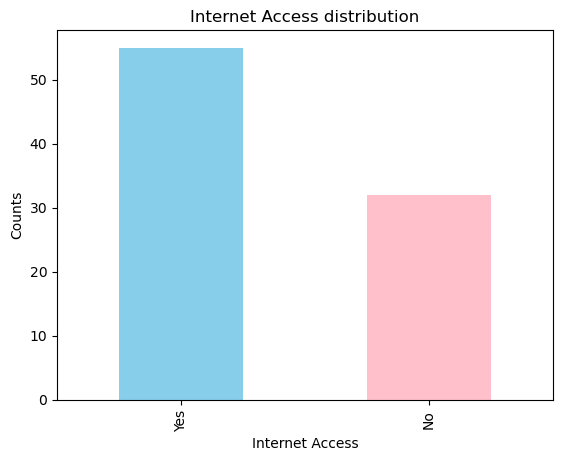

In [25]:

plt.title("Internet Access distribution")
sns.set_palette("muted")
df['Internet_access'].value_counts().plot(kind="bar",
                                                 color=("skyblue", "pink"),
                                                 xlabel="Internet Access",
                                                 ylabel="Counts")
plt.show()

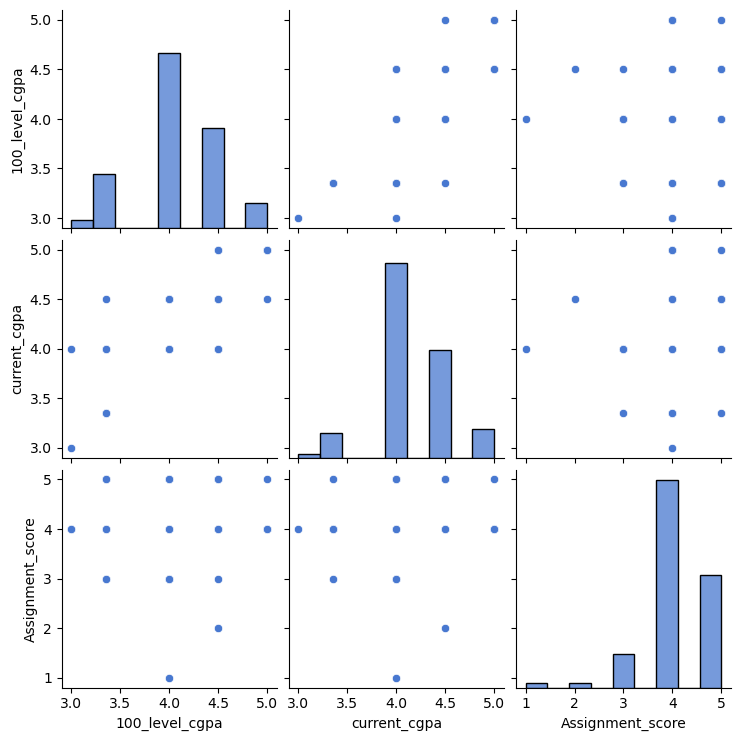

In [26]:
selected_features = ['100_level_cgpa', 'current_cgpa', 'study_hours', 'Assignment_score']
sns.pairplot(df[selected_features])

### TRANSFORMING DATA (DATA PREPROCESSING)

SPLITING DATASET INTO TARGET AND LABEL
 - First Approach: To Predict Perceived Performance
 - Second Approach: To Predict Actual Performance

###### FIRST APPROACH (Predicting Perceived Performance)
using target as 'rate_your_overall_performance'

In [29]:
encoder =  LabelEncoder()
encoder

LabelEncoder()

In [30]:
label = df.drop(columns=['Rate_your_overall_performance.'])
target = df['Rate_your_overall_performance.']


In [31]:
label_encoder_df = label.select_dtypes(include=['object']).columns
label_encoder = label.copy()
for col in label_encoder_df:
    label_encoder[col + '_encoder'] = encoder.fit_transform(label_encoder[col])

X = label_encoder.drop(columns=label, axis=1)
X

,Gender_encoder,family_income_encoder,parent_education_level_encoder,School_encoder,MATH_101_encoder,MATH_102_encoder,COSC_111_encoder,PHY101_encoder,PHY102_encoder,Do_you_have_health_issues_that_affect_your_studies_encoder,Education_motivation_level_encoder,study_hours_encoder,study_preference_encoder,Internet_access_encoder,time_management_skills_encoder,Hall_distance_encoder,Extracurricular_activity_encoder
0,0,3,3,1,1,0,0,0,0,0,0,5,3,1,0,0,1
1,1,0,0,1,0,0,1,0,0,0,0,5,3,1,0,7,0
2,1,2,3,1,1,0,0,0,1,0,2,5,3,1,0,7,1
3,1,0,3,1,0,0,0,0,1,0,2,5,3,1,2,0,1
4,1,2,0,1,1,0,1,2,1,0,2,5,3,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0,2,0,1,0,1,1,1,1,1,0,5,3,1,2,1,1
83,0,2,0,5,1,2,2,1,1,1,2,1,3,0,0,7,1
84,0,1,3,4,2,1,1,2,1,0,0,0,3,0,0,0,1
85,0,0,0,1,0,0,1,0,0,0,2,1,3,1,0,0,1


In [32]:
target_encoder = encoder.fit_transform(target)
y = target_encoder
y

array([0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0])

#### NORMALIZE STANDARD SCALER

In [33]:
scaler = StandardScaler()
scaler

StandardScaler()

In [34]:
X =  pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,Gender_encoder,family_income_encoder,parent_education_level_encoder,School_encoder,MATH_101_encoder,MATH_102_encoder,COSC_111_encoder,PHY101_encoder,PHY102_encoder,Do_you_have_health_issues_that_affect_your_studies_encoder,Education_motivation_level_encoder,study_hours_encoder,study_preference_encoder,Internet_access_encoder,time_management_skills_encoder,Hall_distance_encoder,Extracurricular_activity_encoder
0,-0.800943,1.214097,0.991501,-0.372731,0.463106,-1.002599,-1.180455,-1.053423,-1.316616,-0.492805,-1.288950,0.401931,0.489085,0.762770,-0.604624,-1.383103,0.800943
1,1.248529,-1.615182,-0.968967,-0.372731,-1.086518,-1.002599,0.375599,-1.053423,-1.316616,-0.492805,-1.288950,0.401931,0.489085,0.762770,-0.604624,1.123771,-1.248529
2,1.248529,0.271004,0.991501,-0.372731,0.463106,-1.002599,-1.180455,-1.053423,0.115204,-0.492805,0.847024,0.401931,0.489085,0.762770,-0.604624,1.123771,0.800943
3,1.248529,-1.615182,0.991501,-0.372731,-1.086518,-1.002599,-1.180455,-1.053423,0.115204,-0.492805,0.847024,0.401931,0.489085,0.762770,2.163916,-1.383103,0.800943
4,1.248529,0.271004,-0.968967,-0.372731,0.463106,-1.002599,0.375599,1.902957,0.115204,-0.492805,0.847024,0.401931,0.489085,0.762770,-0.604624,-0.308728,0.800943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,-0.800943,0.271004,-0.968967,-0.372731,-1.086518,0.674826,0.375599,0.424767,0.115204,2.029199,-1.288950,0.401931,0.489085,0.762770,2.163916,-1.024978,0.800943
83,-0.800943,0.271004,-0.968967,3.132955,0.463106,2.352251,1.931654,0.424767,0.115204,2.029199,0.847024,-2.776980,0.489085,-1.311011,-0.604624,1.123771,0.800943
84,-0.800943,-0.672089,0.991501,2.256533,2.012729,0.674826,0.375599,1.902957,0.115204,-0.492805,-1.288950,-3.571707,0.489085,-1.311011,-0.604624,-1.383103,0.800943
85,-0.800943,-1.615182,-0.968967,-0.372731,-1.086518,-1.002599,0.375599,-1.053423,-1.316616,-0.492805,0.847024,-2.776980,0.489085,0.762770,-0.604624,-1.383103,0.800943


In [35]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)
print(X_train.shape, X_test.shape)

(68, 17) (19, 17)


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.74


In [ ]:
!pip install tensorflow

In [37]:
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'